In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sys import argv

pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

get_ipython().run_line_magic("matplotlib", "inline")

import matplotlib.pylab as plt
import pylab as pl
from matplotlib.ticker import FuncFormatter

from matplotlib.pyplot import figure

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)


import copy
import os

results_all = {}

In [ ]:
import os
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.ticker as ticker
import os
import glob


dfs = []
mydict = {}
datasets = [
    "bpic2012",
    "bpic2017",
    "traficFines",
]  

durations = []
interventions = []

dicts = {}

durations2 = {}
interventions2 = {}


def millions(x, pos):
    "The two args are the value and tick position"
    return "%1.1fK" % (x * 1e-3)


def find_convergence(arr):
    convergence_point = None
    for i, value in enumerate(arr):
        if value > 0:
            if all(v > 0 for v in arr[i:]):
                convergence_point = i
                break
    return convergence_point


for dataset_name in datasets:
    if dataset_name == "bpic2012":
        sig = 12
    else:
        sig = 100

    # to obtain the elapsed intervention time
    durations2[dataset_name] = []

    # to collect how many interventions
    interventions2[dataset_name] = []

    # Run each expr three times
    iterations = [1, 2, 3]
    for it in iterations:
        dfs = []
        sum_gaines = {}
        gains = {}

        directory = os.path.join(
            "./resultsICPM/%s/%s/ResourcesResults_%s/resultsResources_%s/"
            % (dataset_name, dataset_name, dataset_name, it)
        )
        for root, dirs, files in os.walk(directory):
            title = root
            for dirr in dirs:
                path = directory + dirr
                csv_files = glob.glob(os.path.join(path, "*.csv"))
                for f in csv_files:
                    df = pd.read_csv(f, sep=";")
                    # nr of resources
                    df.name = str(f).split("/")[-1].split("_")[2]
                    dfs.append(df)
                    durations2[dataset_name].append(df[df.columns[-1]].iloc[0])
                    interventions2[dataset_name].append(df.shape[0])

        for df in dfs:
            gains[df.name] = gaussian_filter1d(df.gain, sigma=sig)

            convergence_index = find_convergence(gains[df.name])
            if convergence_index is None:
                print(f"Array {df.name} does not converge")
                sum_after_convergence = 0
            else:
                print(f"Array {df.name} converges at index {convergence_index}")

                # Calculate sum from convergence point to the end
                sum_after_convergence = np.sum(gains[df.name][convergence_index:])

            sum_gaines[df.name] = sum_after_convergence  # sum(df.gain)


        formatter = FuncFormatter(millions)
        print(sum_gaines)
        lists = sorted(
            sum_gaines.items(), key=lambda item: int(item[0])
        )  
        print(lists)

        x, y = zip(*lists)  # unpack a list of pairs into two tuples
        mydict[it] = lists
        fig, ax = plt.subplots()

        ax.plot(x[::], y[::], label="total gain", marker="s")

        for xs, ys in zip(x[::], y[::]):
            pl.text(
                xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
            )

        plt.grid(True)
        ax.yaxis.set_major_formatter(formatter)
        plt.legend(loc="best")
        plt.ylabel("Total Gain")
        plt.xlabel("# Avaible Resources")
        plt.title("Total gain / resource")
        plt.tight_layout()
        plt.show()

    dicts[dataset_name] = [
        interventions2[dataset_name][0],
        1,
        round(np.mean(durations2[dataset_name], axis=0)),
    ]
    combined_tuples = []
    for k, v in mydict.items():
        [combined_tuples.append(tuple(sub)) for sub in v]

    # Create a dictionary to store the sum and count for each key
    sum_count_dict = {}
    for key, value in combined_tuples:
        if key not in sum_count_dict:
            sum_count_dict[key] = [value, 1]
        else:
            sum_count_dict[key][0] += value
            sum_count_dict[key][1] += 1

    # Calculate the average value for each key
    averages = {
        key: sum_value / count for key, (sum_value, count) in sum_count_dict.items()
    }

    # Print the average values for each key
    for key, average in averages.items():
        print(f"({key}, {average})")

    print(
        f"\nKey: {max(averages, key=averages.get)}, max: {averages[max(averages, key=averages.get)]}"
    )

    my_list = list(averages.items())

    x, y = zip(*my_list)  # unpack a list of pairs into two tuples
    fig, ax = plt.subplots()

    # ("%s - Total gain / resource"% dataset_name.upper())

    if dataset_name.startswith("tr"):
        pass
        ax.plot(x[::], y[::], marker="s")

        for xs, ys in zip(x[::3], y[::3]):
            pl.text(
                xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
            )
        plt.xticks(x[::3], rotation=0)

    else:

        ax.plot(x[::], y[::], marker="s")

        for xs, ys in zip(x[::], y[::]):
            pl.text(
                xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
            )

    plt.grid(True)
    ax.yaxis.set_major_formatter(formatter)
    plt.legend(loc="best")
    plt.ylabel("Total Gain")
    plt.xlabel("# Avaible Resources")
    plt.title("%s - Total gain / resource" % dataset_name.upper())
    plt.tight_layout()
    plt.show()

    results_all[dataset_name] = my_list
    results_all

In [3]:
# Extracted records post-simulation:
# {dataset: [# triggered interventions, Tdur, simulation duration]}
dicts

{'bpic2012': [1172, 1, 365],
 'bpic2017': [7852, 1, 3630],
 'traficFines': [18352, 1, 1322]}

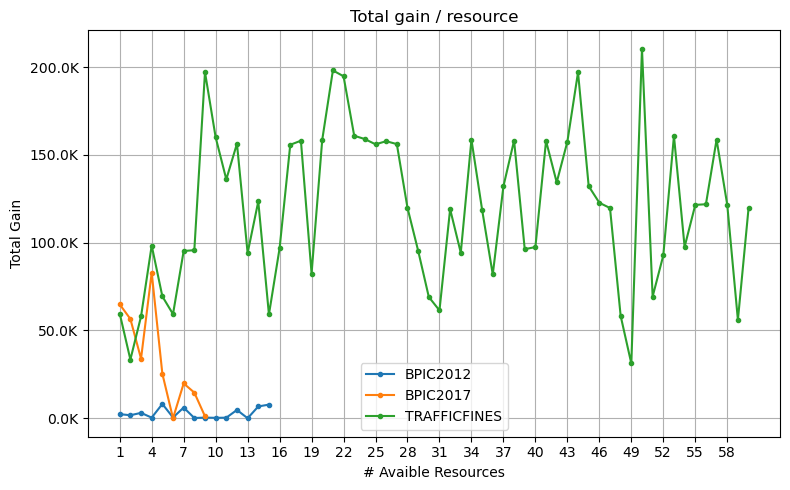

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))

for k, v in results_all.items():
    my_list = v
    x, y = zip(*my_list)  # unpack a list of pairs into two tuples
    if k=="traficFines":
        k="trafficFines"
    else:
        pass

    ax.plot(x[::], y[::], label="%s" % k.upper(), marker=".")


plt.grid(True)
ax.yaxis.set_major_formatter(formatter)
plt.legend(loc="best")
plt.ylabel("Total Gain")
plt.xlabel("# Avaible Resources")
plt.title("Total gain / resource")
plt.xticks(x[::3], rotation=0) 
plt.tight_layout()

plt.show()




In [ ]:
keyss = []

resUtilzList = {}
resUtilz = {}

ll = []



i = 0
for k, v in dicts.items():
    resUtilz = {}
    dataset = k
    x, y = zip(*results_all[k])
    nrInterventions = v[0]
    tdur = v[1]
    elapsedTime = v[2]
    print(
        f"Data: {dataset}, inter: {nrInterventions}, tdur: {tdur}, time: {elapsedTime}"
    )

    for j in x:
        resUtilz[j] = "{:.1%}".format(
            ((nrInterventions * tdur) / (int(j) * elapsedTime))
        )
    resUtilzList[dataset] = resUtilz

    resUtilz = dict(sorted(resUtilz.items(), key=lambda item: int(item[0])))

    resUtilzList[k] = resUtilz

    keys = list(resUtilz.keys())
    values = list(resUtilz.values())

    combined_labels = [
        f"{key}\n\n{value}" for key, value in resUtilz.items()
    ]  
    combined_labels
    ll.append(combined_labels)
    keyss.append(keys)
    print(resUtilz)
    print("")

In [ ]:
heatmap_ranges_dicts = {}

for k, v in resUtilzList.items():
    heatmap_ranges_dicts[k] = []
    print(k)
    print(v)

    percentages = resUtilzList[k]
    # Convert percentage values to float
    percent_float = [float(val.strip("%")) for val in percentages.values()]
    print(percent_float)
    # Calculate threshold values
    if k == "bpic2017":
        pass
        thresholds = [np.inf, 90, 70, 50, 25]
    else:
        thresholds = [np.inf, 90, 75, 50, 25]

    # Create heatmap_ranges
    heatmap_ranges = [1]
    for threshold in thresholds[1:]:
        if threshold >= 90:
            continue
        try:

            heatmap_ranges.append(
                next(
                    idx - 1
                    for idx, val in enumerate(percent_float, start=1)
                    if val <= threshold
                )
            )
        except:
            pass

    heatmap_ranges_dicts[k] = heatmap_ranges

    print(heatmap_ranges)
    print("")

bpic2012
[1, 4, 6, 12]
[ 1.9  2.9  3.9  4.9  5.9  6.9  7.9  8.9  9.9 10.9 11.9 12.9 13.9 14.9
 15.9]


/tmp/ipykernel_99187/2956979916.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_99187/2956979916.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


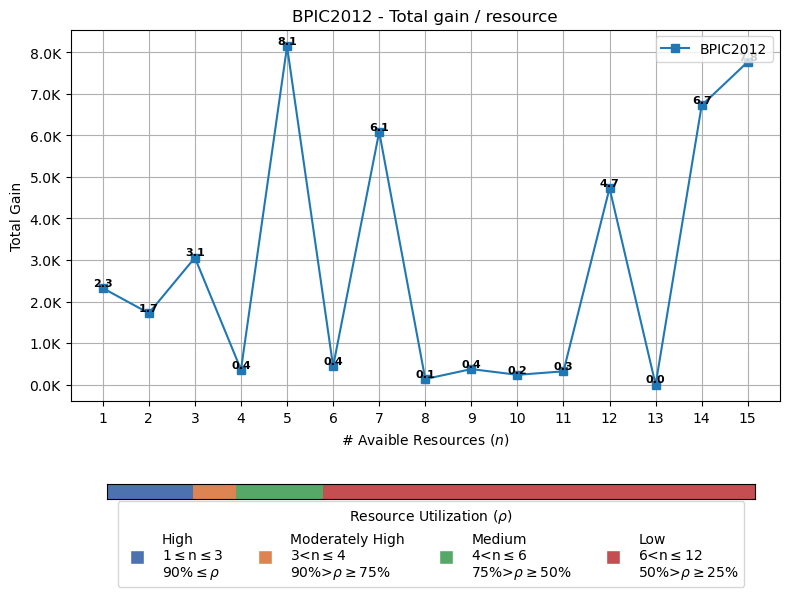

bpic2017
[1, 3, 4, 8]
[1.9 2.9 3.9 4.9 5.9 6.9 7.9 8.9 9.9]


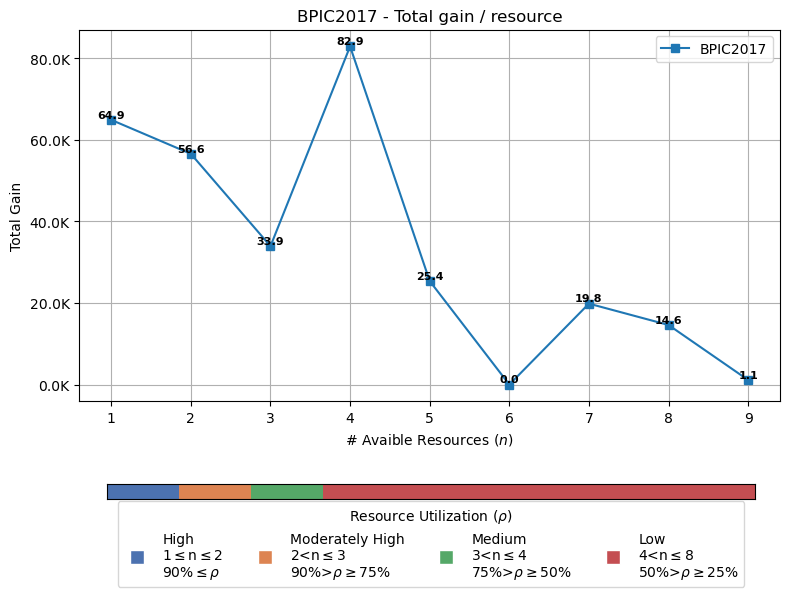

traficFines
[1, 18, 27, 55]
[ 1.9  2.9  3.9  4.9  5.9  6.9  7.9  8.9  9.9 10.9 11.9 12.9 13.9 14.9
 15.9 16.9 17.9 18.9 19.9 20.9 21.9 22.9 23.9 24.9 25.9 26.9 27.9 28.9
 29.9 30.9 31.9 32.9 33.9 34.9 35.9 36.9 37.9 38.9 39.9 40.9 41.9 42.9
 43.9 44.9 45.9 46.9 47.9 48.9 49.9 50.9 51.9 52.9 53.9 54.9 55.9 56.9
 57.9 58.9 59.9 60.9]


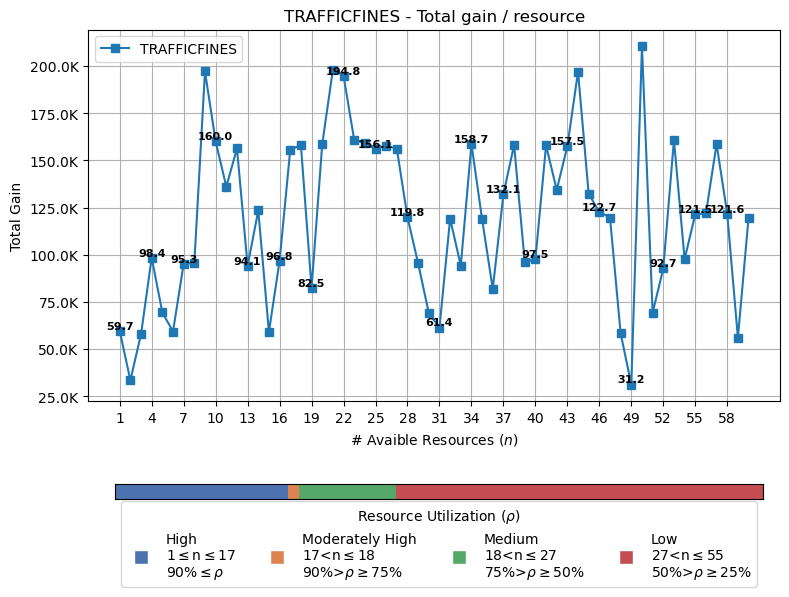

In [17]:
for k, heatmap_ranges in heatmap_ranges_dicts.items():
    print(k)
    print(heatmap_ranges)
    
    fig, ax = plt.subplots()

    import matplotlib.colors as mcolors

    
    x, y = zip(*results_all[k])

    if k=="traficFines":
        k="trafficFines"
    else:
        pass

    ax.plot(x[::], y[::], label="%s" % k.upper(), marker="s")
    if k.startswith("tr"):
        pass
        for xs, ys in zip(x[::3], y[::3]):
                pl.text(
                    xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
                    horizontalalignment='center',
             verticalalignment='bottom',
                )
    else:
        
        for xs, ys in zip(x[::], y[::]):
            pl.text(
                xs, ys, "%1.1f" % (ys * 1e-3), fontsize=8, fontweight="bold",
                horizontalalignment='center',
         verticalalignment='bottom',
            )

    

    plt.grid(True)
    ax.yaxis.set_major_formatter(formatter)
    plt.legend(loc="best")
    plt.ylabel("Total Gain")
    plt.subplots_adjust(bottom=-.6)  # Adjust this value to reduce the space
    plt.xlabel("# Avaible Resources ($n$)\n\n")
    if k.startswith("tr"):
        plt.xticks(x[::3], rotation=0) 
    else:
        plt.xticks(x[::], rotation=0)
    plt.title("%s - Total gain / resource"% k.upper())
    plt.tight_layout()



    heatmap_ranges = heatmap_ranges#[1, 10, 20, 40, 50]

    # Create data for the heatmap bar
    heatmap_data = np.arange(1.9, len(x)+1)
    print(heatmap_data)

    heatmap_colors = ["lightsteelblue", "lightblue", "silver", "antiquewhite",]
    heatmap_labels = [f"High\n${heatmap_ranges[0]}$$\\leq$n$\\leq${heatmap_ranges[1]-1}\n90%$\\leq$$\\rho$",
                      f"Moderately High\n${heatmap_ranges[1]-1}$<n$\\leq${heatmap_ranges[1]}\n90%>$\\rho\geq$75%",
                      f"Medium\n${heatmap_ranges[1]}$<n$\\leq${heatmap_ranges[2]}\n75%>$\\rho\geq$50%",
                      f"Low\n${heatmap_ranges[2]}$<n$\\leq${heatmap_ranges[3]}\n50%>$\\rho\geq$25%",]
    heatmap_ranges = heatmap_ranges

    # Create a colormap
    import  seaborn as sns
    sns.color_palette()#
    cmap =mcolors.ListedColormap(heatmap_colors)
    heatmap_ranges_BoundaryNorm = [heatmap_ranges[0], 
                                   heatmap_ranges[1]-1,
                                   heatmap_ranges[1], 
                                   heatmap_ranges[2], 
                                   heatmap_ranges[3],
                                  ]
    norm = mcolors.BoundaryNorm(heatmap_ranges_BoundaryNorm, cmap.N)
    palette = sns.color_palette("deep", n_colors=len(heatmap_ranges))

    cmap = mcolors.ListedColormap(palette)
    # Create proxy artists for the legend
    proxy_artists = [
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=label)
        for color, label in zip(palette, heatmap_labels)
    ]
    if k.startswith("tra"):
        heatmap_ax = fig.add_axes([0.15, -0.01, 0.81, 0.03])  # Adjust the y-coordinate and other values as needed
        heatmap_ax.imshow([heatmap_data], cmap=cmap, norm=norm,
                          aspect="auto", extent=[0, int(heatmap_ranges[-1]), 0, 1])
        legend = plt.legend(handles=proxy_artists, 
                        bbox_to_anchor=[0.5, -3], loc='center', 
                         title='Resource Utilization ($\\rho$)', ncol=4, )
    else:
        heatmap_ax = fig.add_axes([0.14, -0.01, 0.81, 0.03])  # Adjust the y-coordinate and other values as needed

        heatmap_ax.imshow([heatmap_data], cmap=cmap, norm=norm,
                          aspect="auto", extent=[0, int(heatmap_ranges[-1]), 0, 1])
        legend = plt.legend(handles=proxy_artists, 
                        bbox_to_anchor=[0.5, -3], loc='center', 
                         title='Resource Utilization ($\\rho$)', ncol=4, )

    heatmap_ax.set_yticks([])
    heatmap_ax.set_xticks([])


    
    plt.tight_layout()
    plt.show()









# Plot All components

In [19]:
heatmap_ranges_dicts

{'bpic2012': [1, 4, 6, 12],
 'bpic2017': [1, 3, 4, 8],
 'traficFines': [1, 18, 27, 55]}

In [21]:
def plot1(
    result_df, dataset_name, typee="None",
):

    print(dataset_name)
    if typee == "sumGain":
        pivot_df = result_df.pivot(index='comp', columns='resUtil', values='sumGain')
    else:
        pivot_df = result_df.pivot(index='comp', columns='resUtil', values='convergence')

    ax = pivot_df.plot(kind="bar", rot="horizontal")  # label=l)

    hh = []
    for bar in ax.patches:
        height = np.round(bar.get_height())
        hh.append(height)
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()

        if height < 1000:
            label_text = ""
        else:
            label_text = "{:.1f}k".format(height / 1000)

        if typee == "convergence" and height > 100:
            label_text = "{:.1f}k".format(height / 1000)
        elif typee == "convergence" and height < 100:
            label_text = ""
        else:
            pass

        label_x = x + width / 2
        label_y = y + height  # / 2
        ax.text(
            label_x,
            label_y,
            label_text,
            ha="center",  
            va="top",
            fontsize=8,
            rotation=90,
        )

    if typee == "sumGain":
        t = "%s -  Performance (Total gain)" % dataset_name.upper()
    else:
        t = "%s -  Convergence" % dataset_name.upper()

    ax.legend(
        bbox_to_anchor=(0.9, 1.3),
        loc="best",
        fancybox=True,
        shadow=True,
        title=t,
        ncol=2,
        # nrow=2,
        title_fontsize=10,
        prop={"size": 10,},
        labels=[  # l,
            "High",
            "Moderately High",
            "Medium",
            "Low",
            "BL2 - Metzger et al",
            "BL1 - Bozorgi et al.",
        ],
    )
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xlabel("")
    if typee == "sumGain":
        ax.set_ylabel("Total gain")
    else:
        ax.set_ylabel("# Cases")

    plt.grid(True)
    plt.show()

bpic2012
{1: 'High', 4: 'Moderately High', 6: 'Medium', 12: 'Low', 'Zahra': 'BL1 - Bozorgi et al.', 'Metzger': 'BL2 - Metzger et al'}
Array 1 converges at index 629
 Total gain: 6.8k

Array 4 converges at index 1024
 Total gain: 1.6k

Array 6 converges at index 1158
 Total gain: 0.1k

Array 12 does not converge
 Total gain: 0.0k

Array Zahra converges at index 1161
 Total gain: 0.0k

Array Metzger does not converge
 Total gain: 0.0k



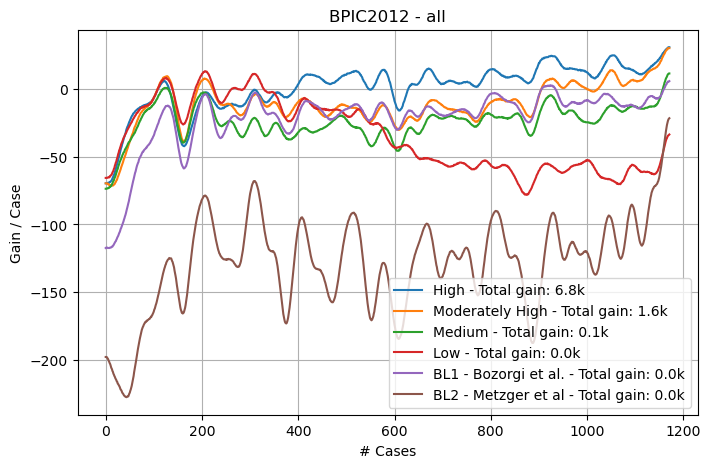

Array 1 converges at index 884
 Total gain: 3.8k

Array 4 converges at index 1132
 Total gain: 0.5k

Array 6 converges at index 1136
 Total gain: 0.3k

Array 12 converges at index 1142
 Total gain: 0.4k

Array Zahra converges at index 1161
 Total gain: 0.0k

Array Metzger does not converge
 Total gain: 0.0k



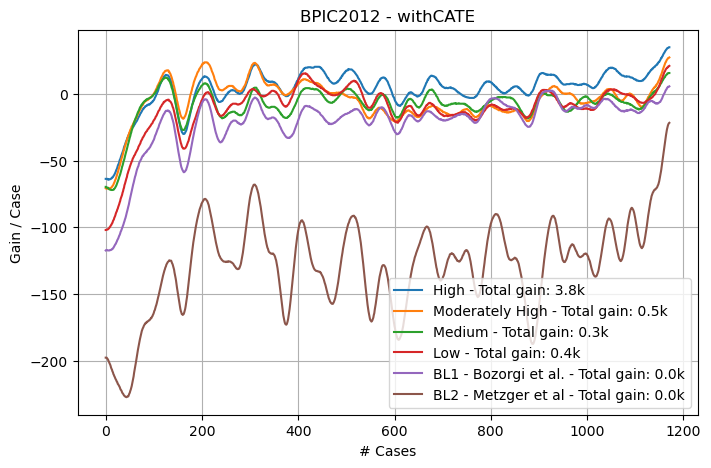

Array 1 converges at index 892
 Total gain: 4.3k

Array 4 converges at index 1159
 Total gain: 0.1k

Array 6 does not converge
 Total gain: 0.0k

Array 12 does not converge
 Total gain: 0.0k

Array Zahra converges at index 1161
 Total gain: 0.0k

Array Metzger does not converge
 Total gain: 0.0k



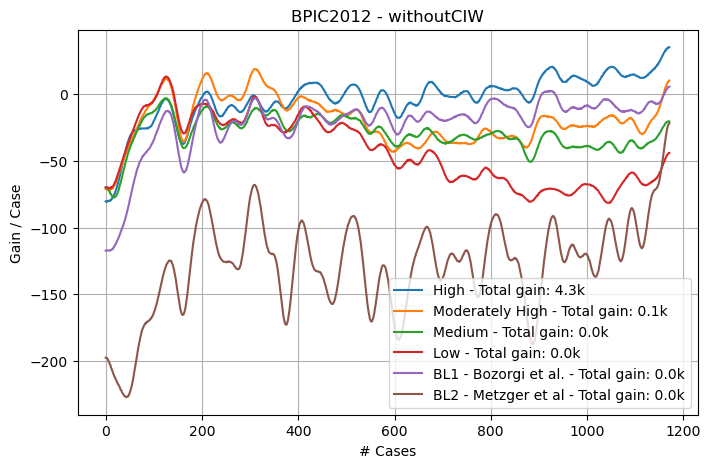

Array 1 converges at index 772
 Total gain: 5.0k

Array 4 converges at index 1155
 Total gain: 0.1k

Array 6 converges at index 1138
 Total gain: 0.4k

Array 12 converges at index 769
 Total gain: 4.5k

Array Zahra converges at index 1161
 Total gain: 0.0k

Array Metzger does not converge
 Total gain: 0.0k



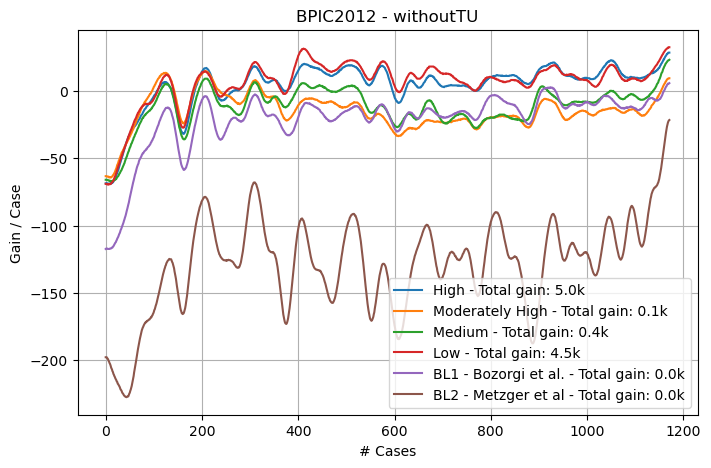

bpic2012


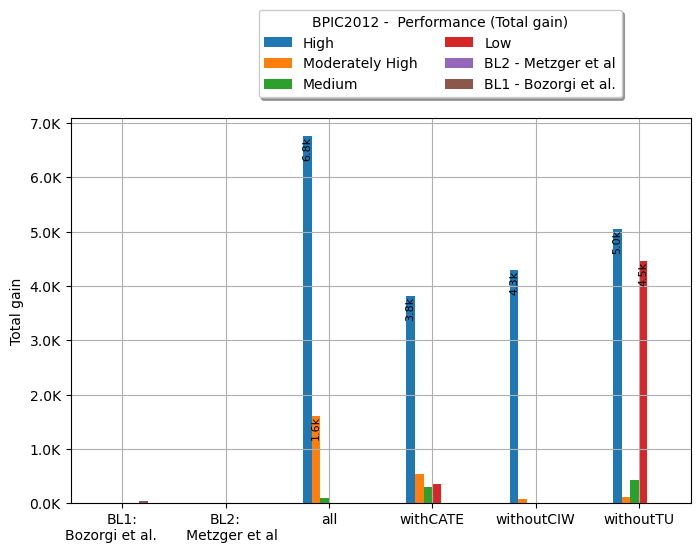

bpic2012


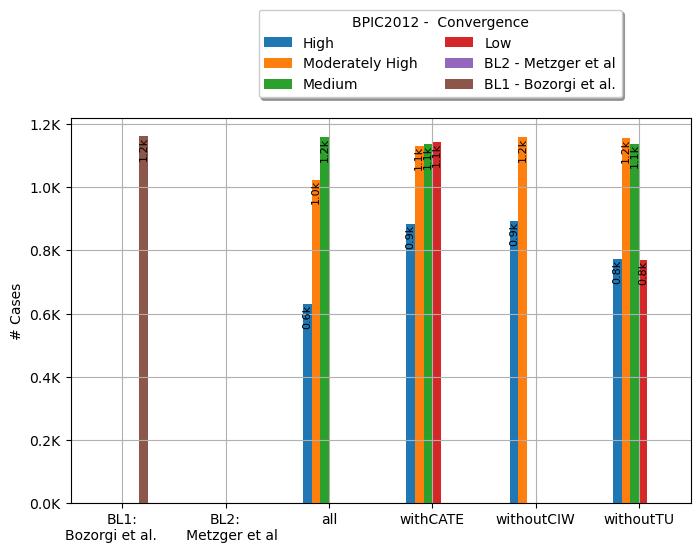

bpic2017
{1: 'High', 3: 'Moderately High', 4: 'Medium', 8: 'Low', 'Zahra': 'BL1 - Bozorgi et al.', 'Metzger': 'BL2 - Metzger et al'}
Array 1 converges at index 7616
 Total gain: 1.1k

Array 3 converges at index 222
 Total gain: 103.2k

Array 4 converges at index 6572
 Total gain: 14.3k

Array 8 does not converge
 Total gain: 0.0k

Array Zahra does not converge
 Total gain: 0.0k

Array Metzger does not converge
 Total gain: 0.0k



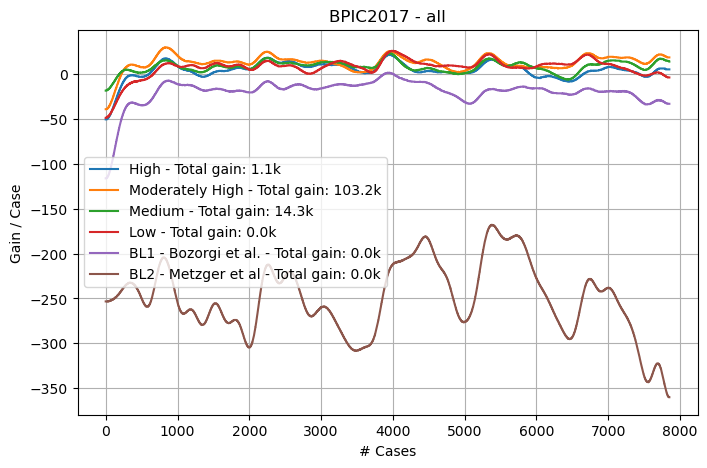

Array 1 does not converge
 Total gain: 0.0k

Array 3 converges at index 7595
 Total gain: 0.9k

Array 4 converges at index 7610
 Total gain: 0.8k

Array 8 converges at index 5072
 Total gain: 45.8k

Array Zahra does not converge
 Total gain: 0.0k

Array Metzger does not converge
 Total gain: 0.0k



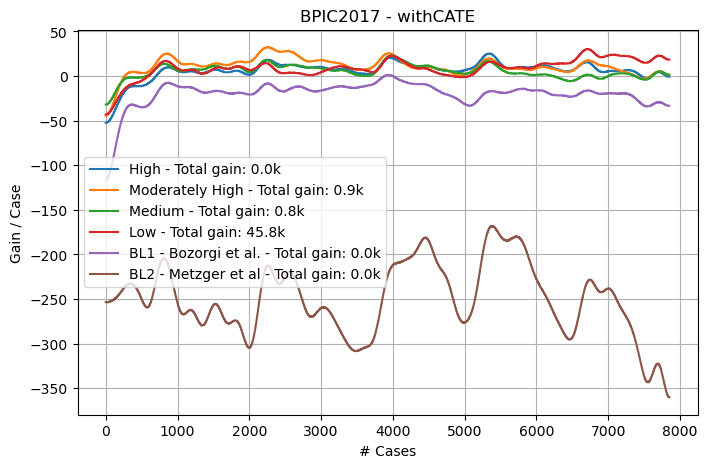

Array 1 does not converge
 Total gain: 0.0k

Array 3 converges at index 3687
 Total gain: 48.1k

Array 4 converges at index 7594
 Total gain: 1.4k

Array 8 converges at index 1707
 Total gain: 78.5k

Array Zahra does not converge
 Total gain: 0.0k

Array Metzger does not converge
 Total gain: 0.0k



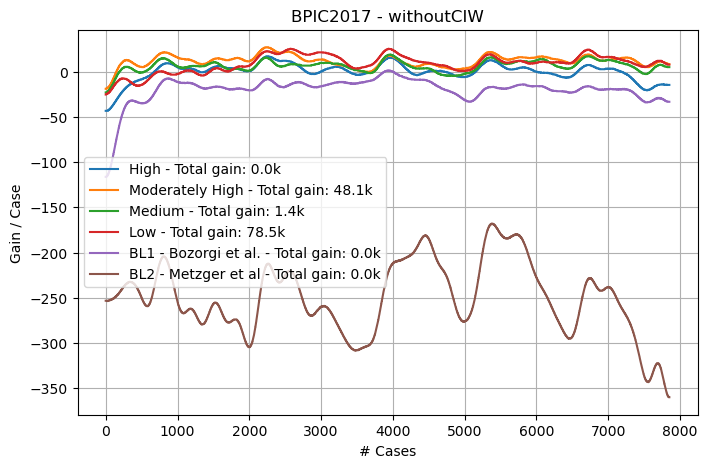

Array 1 converges at index 6535
 Total gain: 8.3k

Array 3 converges at index 4933
 Total gain: 47.8k

Array 4 converges at index 3723
 Total gain: 42.2k

Array 8 does not converge
 Total gain: 0.0k

Array Zahra does not converge
 Total gain: 0.0k

Array Metzger does not converge
 Total gain: 0.0k



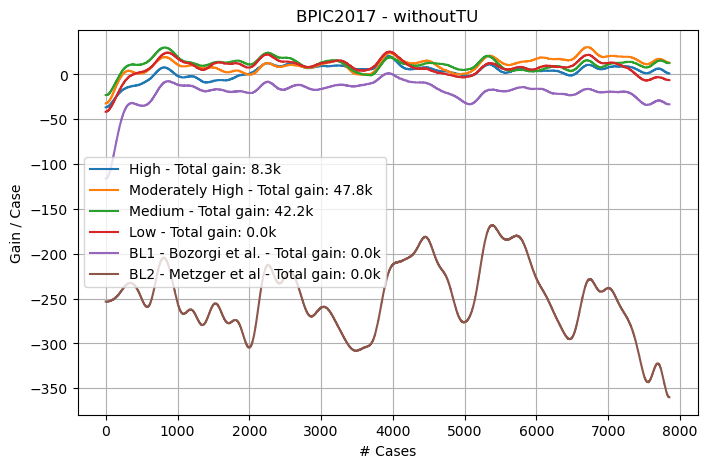

bpic2017


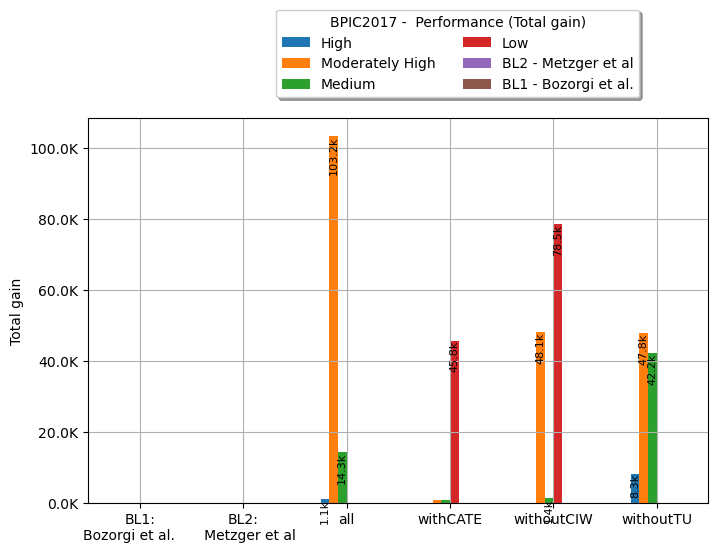

bpic2017


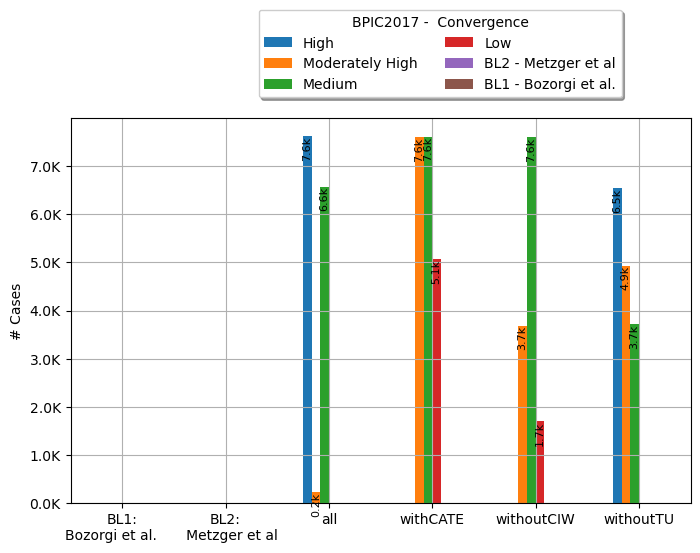

traficFines
{1: 'High', 18: 'Moderately High', 27: 'Medium', 55: 'Low', 'Zahra': 'BL1 - Bozorgi et al.', 'Metzger': 'BL2 - Metzger et al'}
Array 1 converges at index 12375
 Total gain: 195.4k

Array 18 converges at index 15193
 Total gain: 87.1k

Array 27 converges at index 12446
 Total gain: 195.1k

Array 55 converges at index 15933
 Total gain: 81.2k

Array Zahra converges at index 12377
 Total gain: 193.9k

Array Metzger converges at index 17932
 Total gain: 7.4k



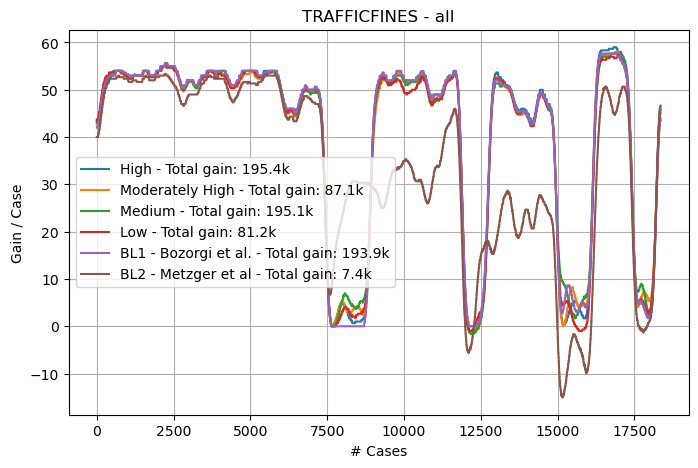

Array 1 converges at index 12513
 Total gain: 197.6k

Array 18 converges at index 12323
 Total gain: 194.8k

Array 27 converges at index 12277
 Total gain: 196.0k

Array 55 converges at index 12325
 Total gain: 197.6k

Array Zahra converges at index 12377
 Total gain: 193.9k

Array Metzger converges at index 17932
 Total gain: 7.4k



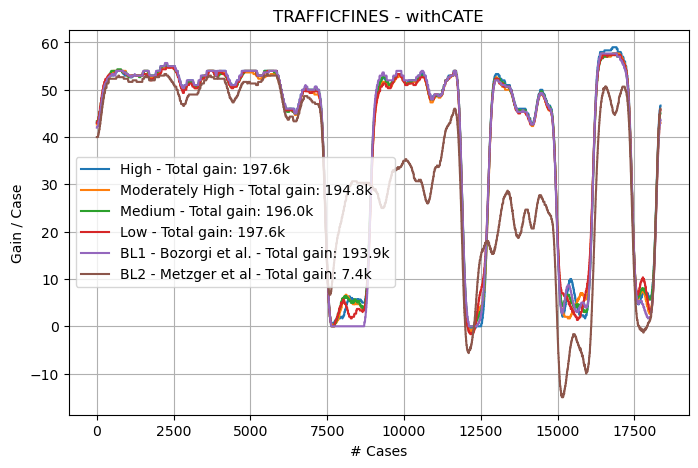

Array 1 converges at index 12263
 Total gain: 198.8k

Array 18 converges at index 12293
 Total gain: 194.5k

Array 27 converges at index 12262
 Total gain: 194.2k

Array 55 converges at index 12312
 Total gain: 194.8k

Array Zahra converges at index 12377
 Total gain: 193.9k

Array Metzger converges at index 17932
 Total gain: 7.4k



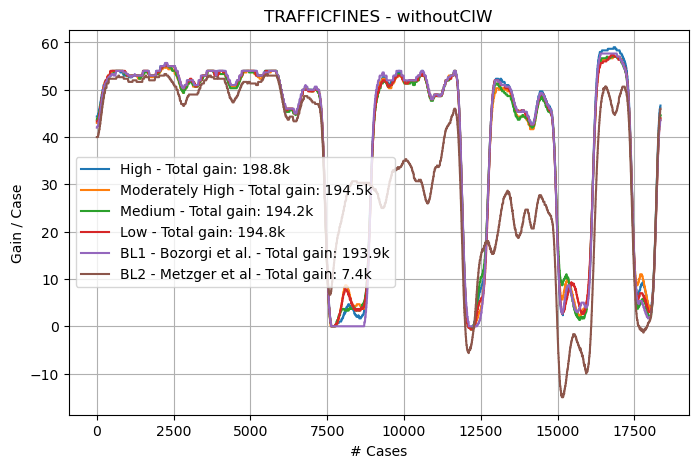

Array 1 converges at index 12530
 Total gain: 193.0k

Array 18 converges at index 12318
 Total gain: 196.8k

Array 27 converges at index 12325
 Total gain: 193.0k

Array 55 converges at index 12335
 Total gain: 190.2k

Array Zahra converges at index 12377
 Total gain: 193.9k

Array Metzger converges at index 17932
 Total gain: 7.4k



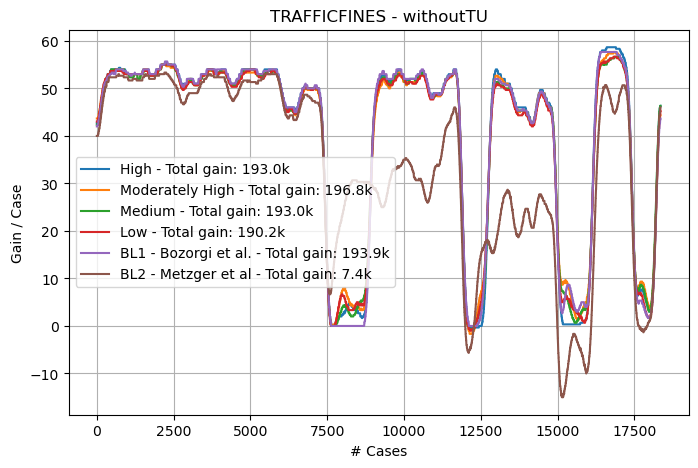

traficFines


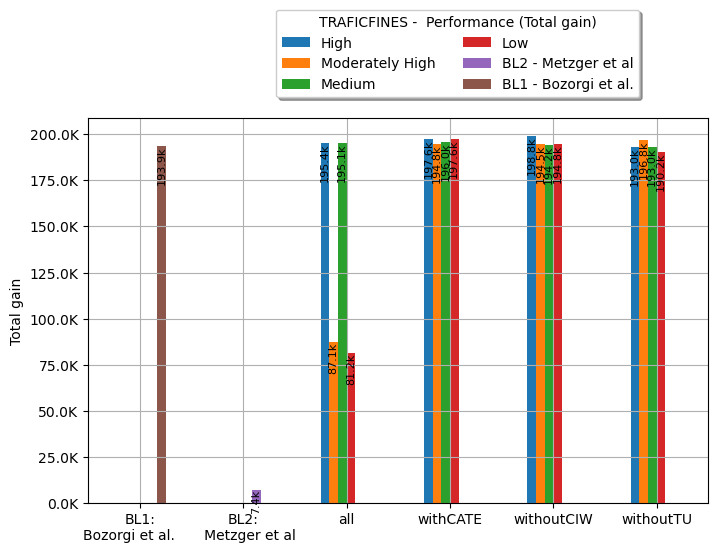

traficFines


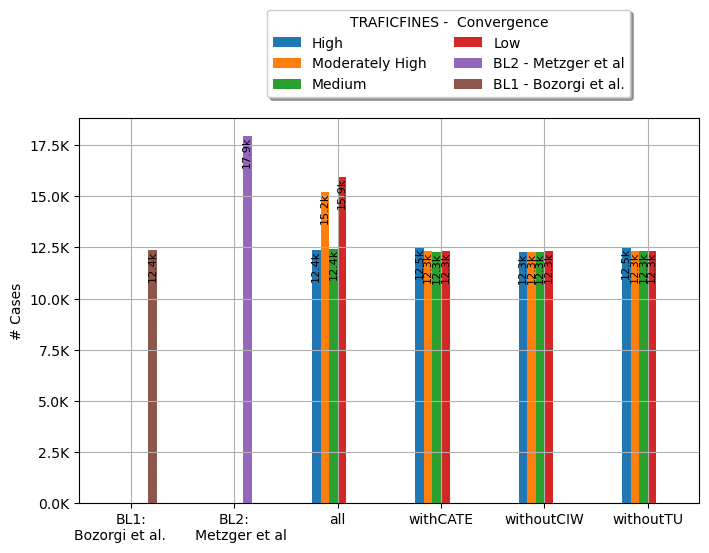

In [22]:
ranges = {}
levels = ["High", "Moderately High", "Medium", "Low",]


dfs = []

datasets = [
    "bpic2012",
    "bpic2017",
    "traficFines"
]  

components = [
    "all",
    "withCATE",
    "withoutCIW",
    "withoutTU",
]


iterations = [1, 2, 3]
ranges = {}
dfs_dict = {}  # {it: [dfs]}
gains_dict = {}
convergence_dict_comp = {}


for k, v in heatmap_ranges_dicts.items():
    print(k)
    #print(v)
    #print(v.index(1))
    
    for value in v:
        ranges[value]=levels[v.index(value)]
        if value == v[-1]:
            ranges["Zahra"]="BL1 - Bozorgi et al."
            ranges["Metzger"]="BL2 - Metzger et al"
            #print(value)
        #print(value)
    print(ranges)
    dataset_name = k
    #print(dataset_name)

    if dataset_name == "bpic2012":
        sig = 12
    else:
        sig = 100
        
    for comp in components:
        convergence_dict_comp[comp] = {}

        iterations = [1, 2, 3]
        for it in iterations:
            gains_dict[it] = {}
            dfs_dict[it] = []

            for rang in ranges.items():
                if rang[0] not in ["Zahra", "Metzger"]:
                    path = os.path.join(
                        "./resultsICPM/%s/%s/%sComponents/%s/mahmoud%s/mahmoud%s"
                        % (dataset_name, dataset_name, dataset_name, comp, it, rang[0])
                    )
                else:
                    path = os.path.join(
                        "./resultsICPM/%s/%s/%sComponents/%s/mahmoud%s"
                        % (dataset_name, dataset_name, dataset_name, rang[0], it,)
                    )
                csv_files = glob.glob(os.path.join(path, "*.csv"))
                for f in csv_files:
                    df = pd.read_csv(f, sep=";")
                    df.name = rang[0]  # str(f).split("/")[7]
                    dfs_dict[it].append((rang[0], df))
                    gains_dict[it][df.name] = []
                    
        for k, v in dfs_dict.items():
            it = k
            for df_name, df in v:
                gains_dict[it][df_name].append(gaussian_filter1d(df.gain, sigma=sig))

        combined_dict = {}

        for k, v in gains_dict.items():
            for key, value in v.items():
                combined_dict.setdefault(key, []).extend(value)

        gains = {}
        sum_gaines = {}
        avg_gaines = {}
        for k, v in combined_dict.items():
            gains[k] = np.mean(v, axis=0)
            sum_gaines[k] = sum(gains[k])
            avg_gaines[k] = np.mean(gains[k])


        def millions(x, pos):
            "The two args are the value and tick position"
            return "%1.1fK" % (x * 1e-3)

        for k, arr in gains.items():
            convergence_dict_comp[comp][k] = []

            convergence_index = find_convergence(arr)
            if convergence_index is None:
                print(f"Array {k} does not converge")
                convergence_dict_comp[comp][k].append([0, 0])
                sum_after_convergence = 0

            else:
                print(f"Array {k} converges at index {convergence_index}")

                # Calculate sum from convergence point to the end
                sum_after_convergence = np.sum(arr[convergence_index:])
                #print(f"Sum after convergence: {sum_after_convergence}")
                convergence_dict_comp[comp][k].append(
                    [convergence_index, sum_after_convergence]
                )
            print(" Total gain: {:.1f}k\n".format(sum_after_convergence / 1000))
            try:

                plt.plot(
                    arr,
                    label=ranges[k]
                    + " - Total gain: {:.1f}k".format(sum_after_convergence / 1000),
                )
            except:
                pass

        formatter = FuncFormatter(millions)
        plt.grid(True)
        plt.legend(loc="best")
        plt.ylabel("Gain / Case")
        plt.xlabel("# Cases")
        if dataset_name=="traficFines":
            d = "trafficFines"
            plt.title(f"{d.upper()} - {comp}")
        else:
            plt.title(f"{dataset_name.upper()} - {comp}")
        plt.show()

    comp = []
    resUtil = []
    convergence = []
    sumGain = []
    dfs = []

    for idx, (title, subdata) in enumerate(convergence_dict_comp.items()):
        columns = ["comp", "resUtil", "convergence", "sumGain"]
        empty_df = pd.DataFrame(columns=columns)
        comp = []
        resUtil = []
        convergence = []
        sumGain = []
        for k, v in subdata.items():
            conv = v[0][0]
            gain = v[0][1]
            if k == "Zahra":#
                #or k == "Metzger":
                comp.append("BL1:\nBozorgi et al.     ")
                resUtil.append("Zahra")
                convergence.append(conv)
                sumGain.append(gain)
                continue
            elif k == "Metzger":
                comp.append("BL2:\n   Metzger et al")
                resUtil.append("Metzger")
                convergence.append(conv)
                sumGain.append(gain)  
                continue

            comp.append(title)
            resUtil.append(k)
            convergence.append(conv)
            sumGain.append(gain)
#         if resUtil=="Zahra":
#             continue
        empty_df["comp"] = comp
        
        empty_df["resUtil"] = resUtil
        empty_df["convergence"] = convergence
        empty_df["sumGain"] = sumGain
        dfs.append(empty_df)
    result_df = pd.concat(dfs, ignore_index=True)
    result_df = result_df.drop_duplicates(keep="last")
    plot1(result_df, dataset_name, "sumGain")
    plot1(result_df, dataset_name, "convergence")


    
    
    ranges = {}
    #break

In [31]:
print("Done!")

Done!
